In [1]:
from models import DiscriminatorNetwork, GeneratorNetwork, Generator128Network, Discriminator128Network
import torch
import matplotlib.pyplot as plt
import numpy as np
from torchvision.utils import make_grid, save_image

/home/nhuengzii/miniconda3/envs/pytorch-env/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = "cuda:0"
generator_state_dict = "./checkpoint/generator128_2.pt"
generator = Generator128Network().to(device)
generator.load_state_dict(torch.load(generator_state_dict))

<All keys matched successfully>

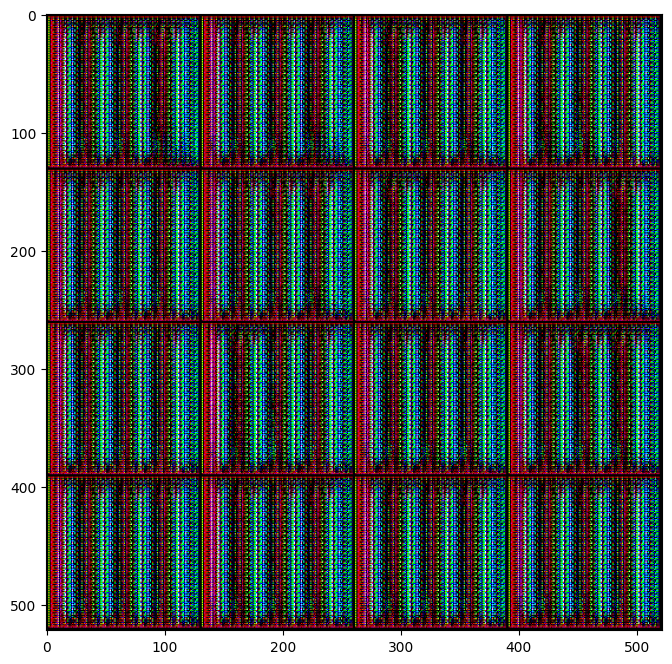

In [11]:
noise = torch.randn(size=(16, 128, 1, 1)).to(device)
with torch.no_grad():
    images = generator(noise)
images_plot = make_grid(images.cpu(), padding=2, normalize=True, nrow=4)
plt.figure(figsize=(8, 8))
plt.imshow(np.transpose(images_plot, (1, 2, 0)))

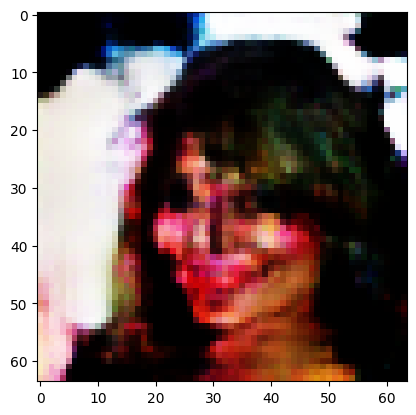

In [4]:
candidate = noise
img = generator(candidate)
img = img * 0.5 + 0.5
plt.imshow(np.transpose(img[0].detach().cpu(), (1, 2, 0)))

In [5]:
print(candidate[0][0][0][0])

tensor(-0.5500, device='cuda:0')


In [6]:
test = np.array([candidate.cpu().numpy()[0] for i in range(64)])
batch = torch.Tensor(test)
batch = batch.to(device)
print(batch.shape)
from torch.utils.tensorboard.writer import SummaryWriter

writer = SummaryWriter()
idx = 4;
for i in range(64):
    batch[i] += 0.08 * i
    images = generator(batch)
    print(images.shape)
    grid = make_grid(images, normalize=True, nrow=8).detach().cpu()
    writer.add_image(img_tensor=grid, dataformats="CHW", tag="yee")



torch.Size([64, 100, 1, 1])


2023-02-27 20:25:23.982366: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


torch.Size([64, 3, 64, 64])
torch.Size([64, 3, 64, 64])
torch.Size([64, 3, 64, 64])
torch.Size([64, 3, 64, 64])
torch.Size([64, 3, 64, 64])
torch.Size([64, 3, 64, 64])
torch.Size([64, 3, 64, 64])
torch.Size([64, 3, 64, 64])
torch.Size([64, 3, 64, 64])
torch.Size([64, 3, 64, 64])
torch.Size([64, 3, 64, 64])
torch.Size([64, 3, 64, 64])
torch.Size([64, 3, 64, 64])
torch.Size([64, 3, 64, 64])
torch.Size([64, 3, 64, 64])
torch.Size([64, 3, 64, 64])
torch.Size([64, 3, 64, 64])
torch.Size([64, 3, 64, 64])
torch.Size([64, 3, 64, 64])
torch.Size([64, 3, 64, 64])
torch.Size([64, 3, 64, 64])
torch.Size([64, 3, 64, 64])
torch.Size([64, 3, 64, 64])
torch.Size([64, 3, 64, 64])
torch.Size([64, 3, 64, 64])
torch.Size([64, 3, 64, 64])
torch.Size([64, 3, 64, 64])
torch.Size([64, 3, 64, 64])
torch.Size([64, 3, 64, 64])
torch.Size([64, 3, 64, 64])
torch.Size([64, 3, 64, 64])
torch.Size([64, 3, 64, 64])
torch.Size([64, 3, 64, 64])
torch.Size([64, 3, 64, 64])
torch.Size([64, 3, 64, 64])
torch.Size([64, 3, 6

torch.Size([64, 3, 64, 64])


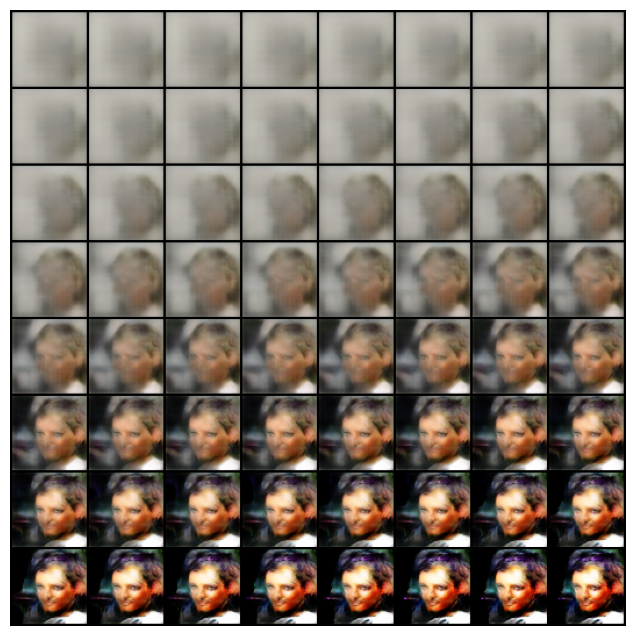

In [7]:
images = generator(batch)
print(images.shape)
grid = make_grid(images, normalize=True, nrow=8).detach().cpu()
plt.figure(figsize=(8, 8))
plt.axis("off")
plt.imshow(np.transpose(grid, (1, 2, 0)))

In [8]:
%tensorboard

UsageError: Line magic function `%tensorboard` not found.


In [9]:
!tensorboard --logdir=runs

zsh:1: command not found: tensorboard
